In [1]:
import xarray as xr
import numpy as np
import matplotlib
from mars_currents.swia_files import load_swia_data as lsd
import matplotlib.colors as colors
import matplotlib.pyplot as plt

%matplotlib widget
import spiceypy as spice
from spiceypy.utils.support_types import SpiceyError
from mars_currents.spice_codes.load_spice_kernels import load_spice_kernels
import pandas as pd

spice.furnsh("pck00010.tpc")

/home/apostolis/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
load_spice_kernels("../maven_spice/maven_time_frames.tm")

In [1]:
start = "2015-08-01T00:00:00.000"
end = "2015-08-02T11:59:59.999"
kind = "onboardsvyspec"
data_path = "../swi/l2"

kernel_path = "../maven_spice/maven_time_frames.tm"

resampling = None  # dict(res_freq = '1min', mode = 'median')
swia_dataset = lsd.load_data(
    start,
    end,
    kind,
    data_path,
    kernel_path,
    resampling=resampling,
    thin_n=15,
)
swia_dataset

NameError: name 'lsd' is not defined

In [4]:
et = swia_dataset["epoch"].values
start_et = spice.utc2et(start)
end_et = spice.utc2et(end)
m = np.where((et >= start_et) & (et <= end_et))
et = et[m]
fluxes = swia_dataset["spectra_diff_en_fluxes"].values[m]
energy = swia_dataset["energy_spectra"].values
times_ticks = np.arange(et[0], et[-1], step=int((et[-1] - et[0]) / 10))
times_ticks_txt = spice.timout(times_ticks, "HR:MN")

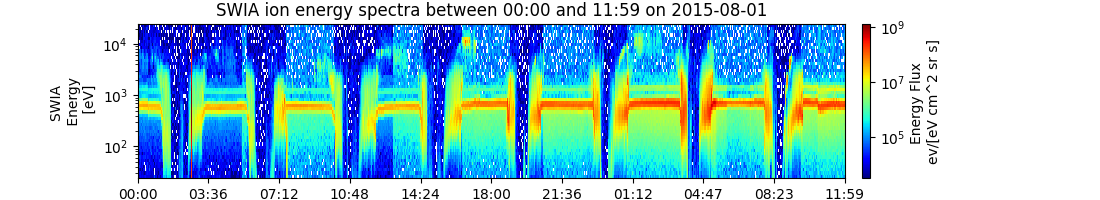

In [5]:
fig, axes = plt.subplots(figsize=(11, 2))
gr = axes.pcolormesh(
    et,
    energy.T,
    fluxes.T,
    norm=colors.LogNorm(),
    cmap="jet",
    rasterized=True,
    shading="auto",
)
axes.set_yscale("log")
axes.set_ylabel(
    f"SWIA \n Energy \n " + "[" + swia_dataset["energy_spectra"].attrs["units"] + "]"
)
fig.colorbar(
    gr,
    ax=axes,
    pad=0.02,
    label="Energy Flux \n" + swia_dataset["spectra_diff_en_fluxes"].attrs["units"],
)
axes.set_xticks(ticks=times_ticks, labels=times_ticks_txt)

start_str = spice.timout(start_et, "HR:MN")
end_str = spice.timout(end_et, "HR:MN")
ymd_str = spice.timout(start_et, "YYYY-MM-DD")
title = f"SWIA ion energy spectra between {start_str} and {end_str} on {ymd_str}"
axes.set_title(title);